In [1]:
import pandas as pd
import helper
import evaluator
import optuna
from optuna.samplers import TPESampler
import strategy

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("out_sample.csv")
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index("datetime", inplace=True)
df

,tickersymbol,price,quantity,SMA50,SMA20,STD20,UpperBB,LowerBB,Resistance,Support,AvgVolume20
datetime,,,,,,,,,,,
2023-01-03 08:45:00,VN30F2301,939.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-03 08:46:00,VN30F2301,941.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-03 08:47:00,VN30F2301,989.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-03 08:48:00,VN30F2301,993.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-03 08:49:00,VN30F2301,995.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-20 14:39:00,VN30F2312,1095.0,0.0,1094.376,1095.170,0.563915,1096.297830,1094.042170,1096.7,1093.8,924967.60
2023-12-20 14:42:00,VN30F2312,1095.4,0.0,1094.418,1095.130,0.513092,1096.156184,1094.103816,1096.7,1093.8,858359.90
2023-12-20 14:43:00,VN30F2312,1095.5,0.0,1094.460,1095.110,0.488715,1096.087429,1094.132571,1096.7,1094.3,743971.60


In [3]:
# Assume df is already loaded and contains required columns like "Close", "SMA50", "UpperBB", "LowerBB", etc.

initial_balance = 40_000_000
SMA_WINDOW_LENGTH = 50
TAKE_PROFIT_THRES_MEAN_REVERSION = 5
TAKE_PROFIT_THRES_MOMENTUM = 10
CUT_LOSS_THRES_MEAN_REVERSION = 5
CUT_LOSS_THRES_MOMENTUM = 4

results1 = strategy.strategy(
    df,
    SMA_WINDOW_LENGTH,
    TAKE_PROFIT_THRES_MEAN_REVERSION,
    TAKE_PROFIT_THRES_MOMENTUM,
    CUT_LOSS_THRES_MEAN_REVERSION,
    CUT_LOSS_THRES_MOMENTUM,
    initial_balance,
)

# Print results
for key, value in results1.items():
    if key != "PnL Over Time":  # Avoid printing a long list
        print(f"{key}: {value}")


Initial Balance: 40000000
Final Balance: 105258000.00000004
Win Rate: 93.47826086956522
Total Trades: 46
Winning Trades: 43
Losing Trades: 3
Accumulated Return: 1.631450000000001
Sharpe Ratio: 0.019119642119491697
Max Drawdown: -0.015752822662429847


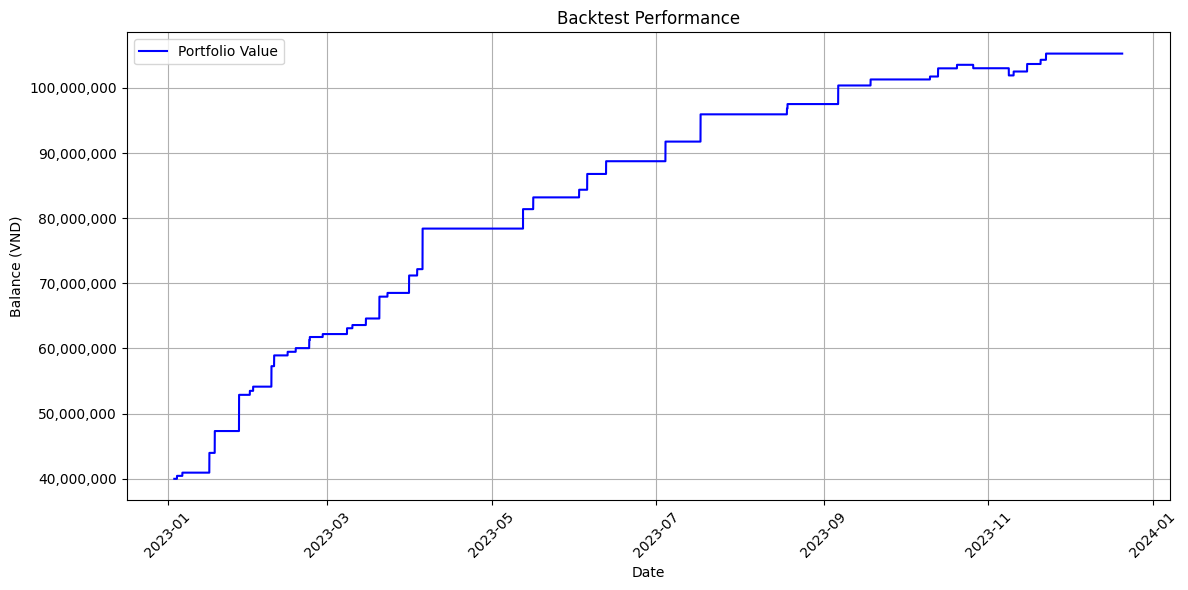

In [4]:
PnL = results1["PnL Over Time"]
date_list = df.index[SMA_WINDOW_LENGTH - 1:]  # Align dates with pnl_list length

helper.plot_performance(PnL, date_list)


# Optimized parameters

In [5]:


initial_balance = 40_000_000
SMA_WINDOW_LENGTH = 64
TAKE_PROFIT_THRES_MEAN_REVERSION = 10
TAKE_PROFIT_THRES_MOMENTUM = 12
CUT_LOSS_THRES_MEAN_REVERSION = 6.5
CUT_LOSS_THRES_MOMENTUM = 7.5

results2 = strategy.strategy(
    df,
    SMA_WINDOW_LENGTH,
    TAKE_PROFIT_THRES_MEAN_REVERSION,
    TAKE_PROFIT_THRES_MOMENTUM,
    CUT_LOSS_THRES_MEAN_REVERSION,
    CUT_LOSS_THRES_MOMENTUM,
    initial_balance,
)

# Print results
for key, value in results2.items():
    if key != "PnL Over Time":  # Avoid printing a long list
        print(f"{key}: {value}")


Initial Balance: 40000000
Final Balance: 114482000.00000006
Win Rate: 93.18181818181817
Total Trades: 44
Winning Trades: 41
Losing Trades: 3
Accumulated Return: 1.8620500000000013
Sharpe Ratio: 0.02010498585950021
Max Drawdown: -0.016528629306944747


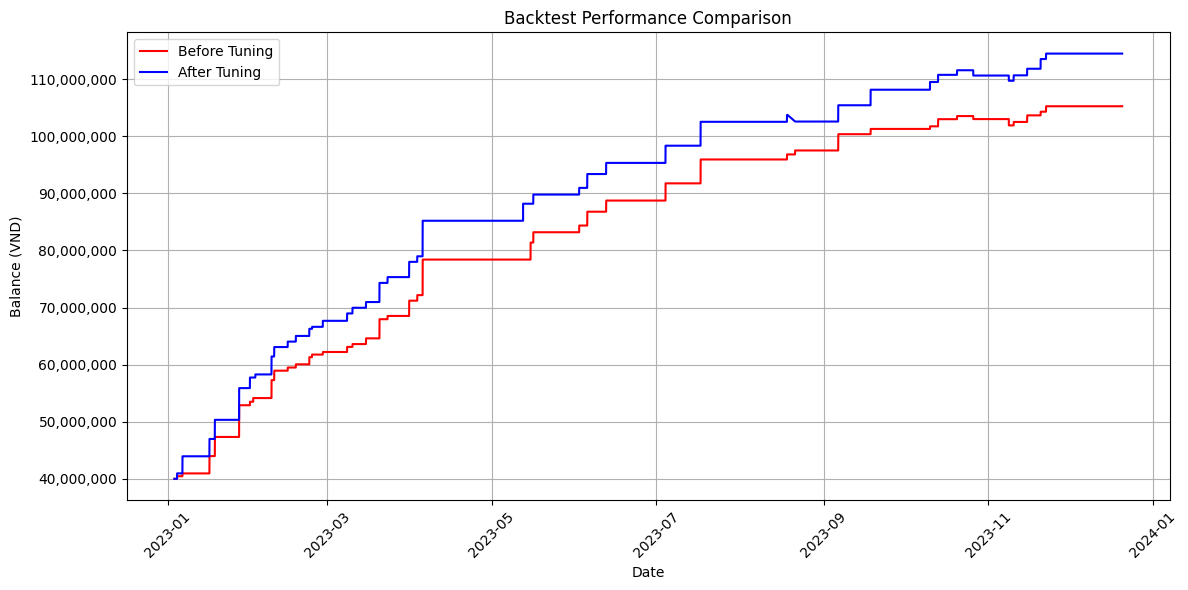

In [6]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

PnL_before = results1["PnL Over Time"]
PnL_after = results2["PnL Over Time"]
dates = df.index[SMA_WINDOW_LENGTH - 1:]
labels=("Before Tuning", "After Tuning")

min_len = min(len(PnL_before), len(PnL_after))

PnL_before = PnL_before[:min_len]
PnL_after = PnL_after[:min_len]
dates = dates[:min_len]

plt.figure(figsize=(12, 6))
    
plt.plot(dates, PnL_before, label=labels[0], color="red")
plt.plot(dates, PnL_after, label=labels[1], color="blue")

plt.xlabel("Date")
plt.ylabel("Balance (VND)")
plt.title("Backtest Performance Comparison")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
formatter = FuncFormatter(lambda x, _: f"{x:,.0f}")
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()